<a href="https://colab.research.google.com/github/sakshi2k02/Netflix-Data/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

df = pd.read_csv("netflix1.csv")


In [ ]:
df.shape

(8790, 10)

In [ ]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [ ]:
x = df.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0          G      41
1      NC-17       3
2         NR      79
3         PG     287
4      PG-13     490
5          R     799
6      TV-14    2157
7       TV-G     220
8      TV-MA    3205
9      TV-PG     861
10      TV-Y     306
11     TV-Y7     333
12  TV-Y7-FV       6
13        UR       3


In [ ]:
piechart = px.pie(x, values = 'counts', names = 'rating', title = 'Distribution of content on Netflix')
piechart.show()

In [ ]:
df['director']=df['director'].fillna('Director not specified')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
directors_list = pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [ ]:
directors_list = df['director'].str.split(',',expand=True).stack()
print(directors_list)

0     0    Kirsten Johnson
1     0    Julien Leclercq
2     0      Mike Flanagan
3     0      Bruno Garotti
4     0       Haile Gerima
                ...       
8785  0          Not Given
8786  0          Not Given
8787  0          Not Given
8788  0          Not Given
8789  0          Not Given
Length: 9610, dtype: object


In [ ]:
directors_list = directors_list.to_frame()
print(directors_list)

                      0
0    0  Kirsten Johnson
1    0  Julien Leclercq
2    0    Mike Flanagan
3    0    Bruno Garotti
4    0     Haile Gerima
...                 ...
8785 0        Not Given
8786 0        Not Given
8787 0        Not Given
8788 0        Not Given
8789 0        Not Given

[9610 rows x 1 columns]


In [ ]:
directors_list.columns = ['Director']
print(directors_list)

               Director
0    0  Kirsten Johnson
1    0  Julien Leclercq
2    0    Mike Flanagan
3    0    Bruno Garotti
4    0     Haile Gerima
...                 ...
8785 0        Not Given
8786 0        Not Given
8787 0        Not Given
8788 0        Not Given
8789 0        Not Given

[9610 rows x 1 columns]


In [ ]:
directors = directors_list.groupby(['Director']).size().reset_index(name = 'Total Count')
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5115                Çagan Irmak            1
5116           Ísold Uggadóttir            1
5117        Óskar Thór Axelsson            1
5118           Ömer Faruk Sorak            2
5119               Şenol Sönmez            2

[5120 rows x 2 columns]


In [ ]:
directors = directors[directors.Director != 'Not Given']
print(directors)

                 Director  Total Count
4020        Rajiv Chilaka           23
841   Alastair Fothergill           19
4067          Raúl Campos           18
261             Jan Suter           18
3234         Marcus Raboy           16
...                   ...          ...
5061         Yeo Siew Hua            1
5062       Yesim Ustaoglu            1
5063        Yeung Yat-Tak            1
5064         Yibrán Asuad            1
2560        Joaquín Mazón            1

[5119 rows x 2 columns]


In [ ]:
directors = directors.sort_values(by=['Total Count'],ascending = False)
print(directors)

                 Director  Total Count
4020        Rajiv Chilaka           23
841   Alastair Fothergill           19
4067          Raúl Campos           18
261             Jan Suter           18
3234         Marcus Raboy           16
...                   ...          ...
2339           J Blakeson            1
2340             J. Davis            1
2341      J. Lee Thompson            1
2342      J. Michael Long            1
2560        Joaquín Mazón            1

[5119 rows x 2 columns]


In [ ]:
top5directors = directors.head()
print(top5directors)

                 Director  Total Count
4020        Rajiv Chilaka           23
841   Alastair Fothergill           19
4067          Raúl Campos           18
261             Jan Suter           18
3234         Marcus Raboy           16


In [ ]:
top5directors = top5directors.sort_values(by=['Total Count'])
barchart = px.bar(top5directors, x='Total Count', y='Director', title='Top 5 Directors on Netflix')
barchart.show()

* Analyzing the content produced on netflix based on years


In [ ]:
df1 = df[['type','release_year']]
df1 = df1.rename(columns = {"release_year":"Release Year","type": "Type"})
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total Count')
print(df2)


     Release Year     Type  Total Count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]


In [ ]:
df2 = df2 [df2['Release Year']>1995]
graph = px.line(df2, x="Release Year" , y="Total Count" , color="Type", title="Trend Of Content Produced on Netflix Per Year")
graph.show()

How many movies and  tv shows are in dataset

> Add blockquote



In [ ]:
df.groupby('type').type.count()

,type
type,
Movie,6126
TV Show,2664


<Axes: xlabel='count', ylabel='type'>

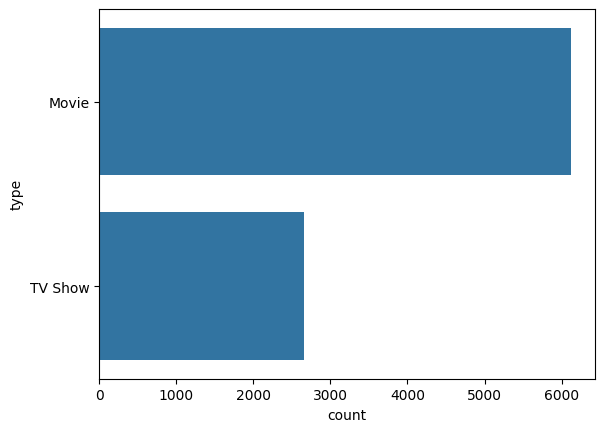

In [ ]:
sns.countplot(df['type'])

show only the titles of all tv shows that were released in india only

In [ ]:
df[(df['type']=='TV Show') & (df['country']=='India')] ['title']

,title
409,Navarasa
954,Sab Jholmaal Hai
1225,Pitta Kathalu
1371,Paava Kadhaigal
2387,Jamtara - Sabka Number Ayega
...,...
8691,Thackeray
8715,The Golden Years with Javed Akhtar
8721,The House That Made Me
8724,The Jungle Book


Content of top 10 countries on netflix

In [ ]:
df['country'].value_counts().head(10)

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
Canada,271
Japan,259
South Korea,214
France,213


Text(0.5, 1.0, 'Content of Top 10 Countries on Netflix')

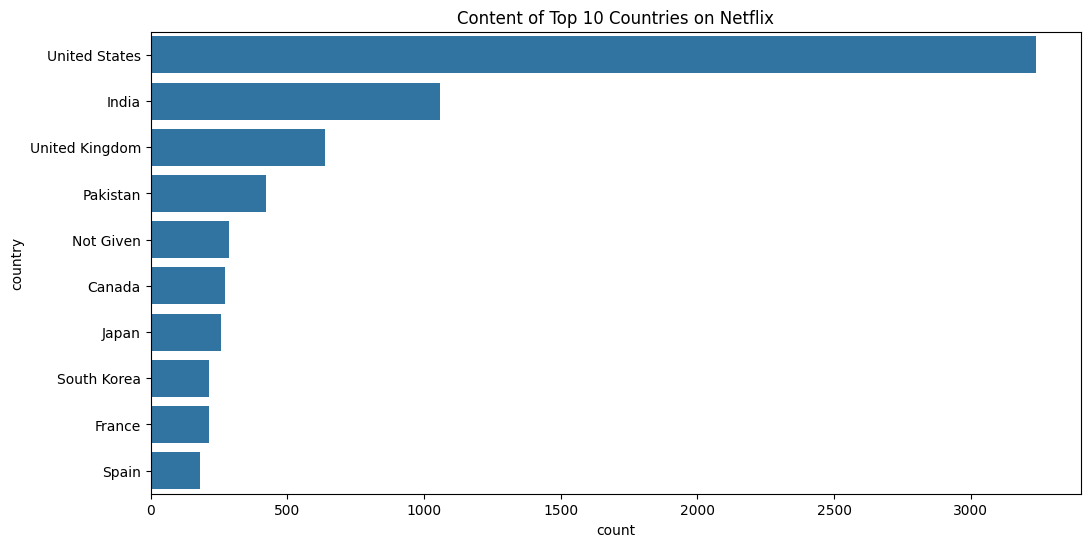

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y='country',order = df['country'].value_counts().index[0:10],data=df)
plt.title('Content of Top 10 Countries on Netflix')

Rating of shoe on netflix vs count

Text(0.5, 1.0, 'Rating of Show on Netflix VS Count')

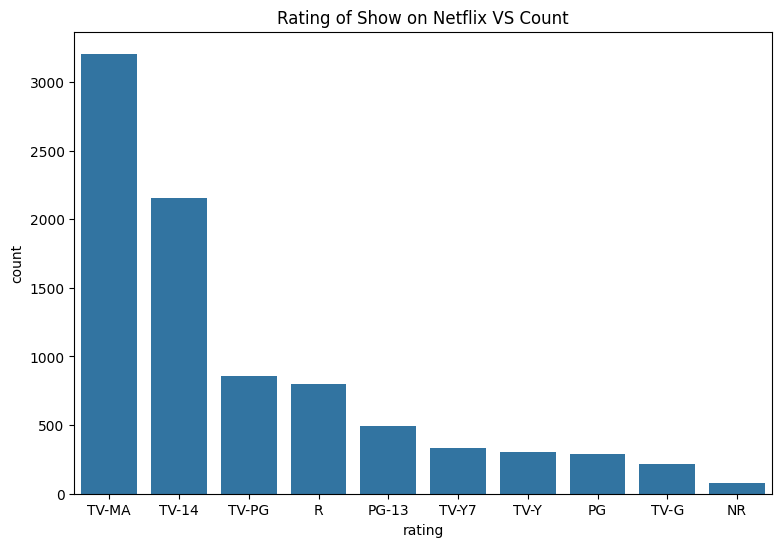

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x='rating',order = df['rating'].value_counts().index[0:10],data=df)
plt.title('Rating of Show on Netflix VS Count')

popular genres analysis

Text(0.5, 1.0, 'Top 15 Genres on Netflix')

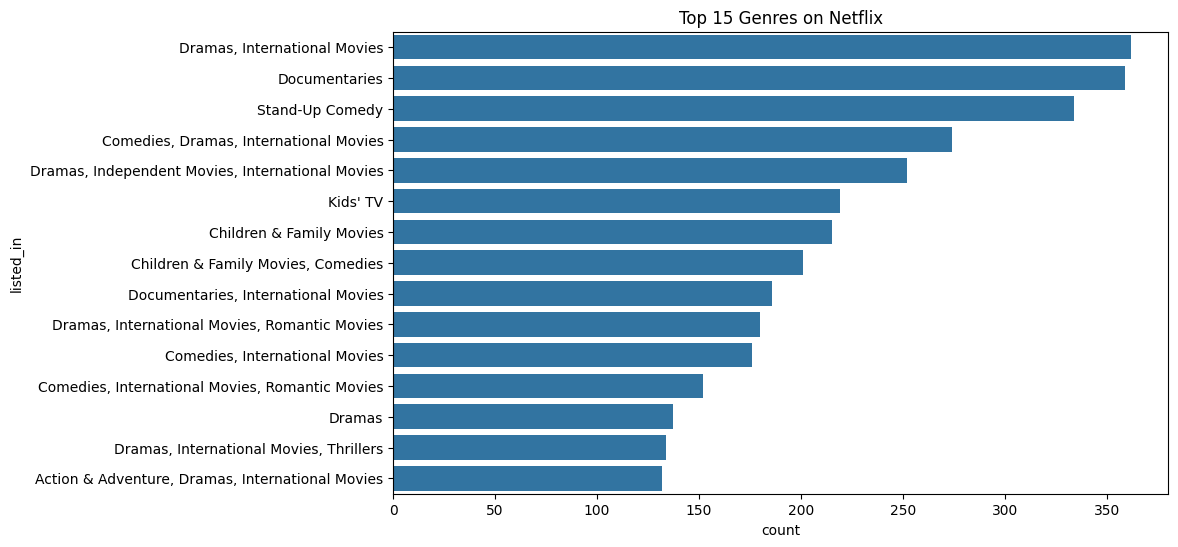

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='listed_in',order = df['listed_in'].value_counts().index[0:15],data=df)
plt.title('Top 15 Genres on Netflix')